# Deep Learning (Neural Network) Earthquake-scour RC Bridge

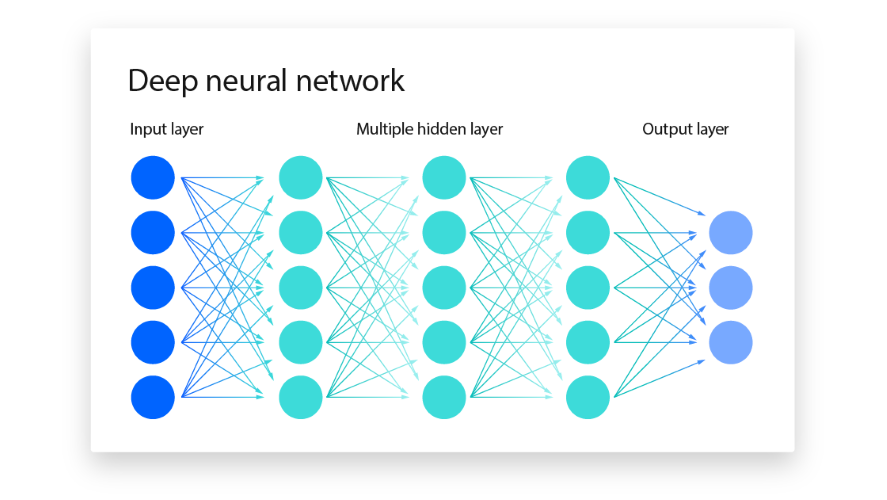

# Importing important and primary libraries:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load data from CSV file:

In [2]:
# the address of the file may differ on different systems
import pandas as pd
df = pd.read_csv("e:/RCBridgeDataSetbyArefJozi.csv")

In [3]:
df

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,absmaxstrainconcretecompression,absmaxstrainrebartension,damageindex
0,1,0.28600,0.348,0.32877,0.49779,30,0.00,0.00,0.00,0,0,0,0.000839,0.000760,0
1,1,0.28600,0.348,0.32877,0.49779,30,2.75,2.00,2.25,11,8,9,0.000869,0.000802,0
2,1,0.28600,0.348,0.32877,0.49779,30,3.25,1.75,2.50,13,7,10,0.000876,0.000796,0
3,1,0.28600,0.348,0.32877,0.49779,30,2.25,1.00,2.00,9,4,8,0.000861,0.000764,0
4,1,0.28600,0.348,0.32877,0.49779,30,2.00,4.00,4.00,8,16,16,0.000886,0.000858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2,0.10094,0.069,0.08846,0.11453,40,2.50,1.75,2.25,10,7,9,0.000195,0.000014,0
1196,2,0.10094,0.069,0.08846,0.11453,40,1.00,1.00,2.00,4,4,8,0.000191,0.000011,0
1197,2,0.10094,0.069,0.08846,0.11453,40,2.00,3.25,1.75,8,13,7,0.000190,0.000017,0
1198,2,0.10094,0.069,0.08846,0.11453,40,1.75,2.00,2.75,7,8,11,0.000195,0.000016,0


In [4]:
df = df.drop('absmaxstrainconcretecompression', axis=1)
df = df.drop('absmaxstrainrebartension' , axis=1)
df

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,damageindex
0,1,0.28600,0.348,0.32877,0.49779,30,0.00,0.00,0.00,0,0,0,0
1,1,0.28600,0.348,0.32877,0.49779,30,2.75,2.00,2.25,11,8,9,0
2,1,0.28600,0.348,0.32877,0.49779,30,3.25,1.75,2.50,13,7,10,0
3,1,0.28600,0.348,0.32877,0.49779,30,2.25,1.00,2.00,9,4,8,0
4,1,0.28600,0.348,0.32877,0.49779,30,2.00,4.00,4.00,8,16,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2,0.10094,0.069,0.08846,0.11453,40,2.50,1.75,2.25,10,7,9,0
1196,2,0.10094,0.069,0.08846,0.11453,40,1.00,1.00,2.00,4,4,8,0
1197,2,0.10094,0.069,0.08846,0.11453,40,2.00,3.25,1.75,8,13,7,0
1198,2,0.10094,0.069,0.08846,0.11453,40,1.75,2.00,2.75,7,8,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   faultindex              1200 non-null   int64  
 1   pgalong                 1200 non-null   float64
 2   pgatran                 1200 non-null   float64
 3   sat11                   1200 non-null   float64
 4   sat12                   1200 non-null   float64
 5   phi                     1200 non-null   int64  
 6   scourdepthp1            1200 non-null   float64
 7   scourdepthp2            1200 non-null   float64
 8   scourdepthp3            1200 non-null   float64
 9   numeliminatedspringsp1  1200 non-null   int64  
 10  numeliminatedspringsp2  1200 non-null   int64  
 11  numeliminatedspringsp3  1200 non-null   int64  
 12  damageindex             1200 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 122.0 KB


In [6]:
df.describe()

,faultindex,pgalong,pgatran,sat11,sat12,phi,scourdepthp1,scourdepthp2,scourdepthp3,numeliminatedspringsp1,numeliminatedspringsp2,numeliminatedspringsp3,damageindex
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.500000,0.415014,0.355819,0.511943,0.483070,35.000000,2.350000,2.350000,2.350000,9.400000,9.400000,9.400000,0.431667
std,0.500208,0.347617,0.215721,0.373748,0.365216,4.084185,1.195278,1.195278,1.195278,4.781114,4.781114,4.781114,0.982073
min,1.000000,0.070830,0.069000,0.088460,0.072070,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.189625,0.158892,0.240393,0.223765,30.000000,1.750000,1.750000,1.750000,7.000000,7.000000,7.000000,0.000000
50%,1.500000,0.309300,0.334900,0.380045,0.378835,35.000000,2.375000,2.375000,2.375000,9.500000,9.500000,9.500000,0.000000
75%,2.000000,0.566942,0.538052,0.710035,0.565998,40.000000,3.250000,3.250000,3.250000,13.000000,13.000000,13.000000,0.000000
max,2.000000,1.779420,0.990240,1.658880,1.688240,40.000000,4.000000,4.000000,4.000000,16.000000,16.000000,16.000000,3.000000


In [7]:
X = df [['faultindex', 'pgalong', 'pgatran', 'sat11', 'sat12', 'phi','scourdepthp1', 'scourdepthp2', 'scourdepthp3','numeliminatedspringsp1', 'numeliminatedspringsp2','numeliminatedspringsp3']].values
X[0:5]

array([[ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         2.75   ,  2.     ,  2.25   , 11.     ,  8.     ,  9.     ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         3.25   ,  1.75   ,  2.5    , 13.     ,  7.     , 10.     ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         2.25   ,  1.     ,  2.     ,  9.     ,  4.     ,  8.     ],
       [ 1.     ,  0.286  ,  0.348  ,  0.32877,  0.49779, 30.     ,
         2.     ,  4.     ,  4.     ,  8.     , 16.     , 16.     ]])

In [8]:
y = df ['damageindex'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# Preprocessing and normalizing

In [9]:
# normalizing
from sklearn import preprocessing
print('original data :\n')
print(X[0:5])
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
print('\nnormalized data:\n')
print(X[0:5])

original data :

[[ 1.       0.286    0.348    0.32877  0.49779 30.       0.       0.
   0.       0.       0.       0.     ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       2.75     2.
   2.25    11.       8.       9.     ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       3.25     1.75
   2.5     13.       7.      10.     ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       2.25     1.
   2.       9.       4.       8.     ]
 [ 1.       0.286    0.348    0.32877  0.49779 30.       2.       4.
   4.       8.      16.      16.     ]]

normalized data:

[[-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
  -1.96688878 -1.96688878 -1.96688878 -1.96688878 -1.96688878 -1.96688878]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
   0.33478958 -0.29294088 -0.0836974   0.33478958 -0.29294088 -0.0836974 ]
 [-1.         -0.37129205 -0.0362621  -0.49030144  0.04032102 -1.22474487
   0.75327656 -0.50218437  0.12554609  0.75327656

In [10]:
X.shape

(1200, 12)

In [11]:
y.shape

(1200,)

# Train test split:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# "Do not change the random state". random state is a command that shuffles the data in a certain manner.
# so changing the random state will change the shuffeling which leads to big changes in the final results
# we want the changes be constant each time we run the program
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (960, 12) (960,)
Test set: (240, 12) (240,)


In [13]:
X_train[0]

array([-1.        , -0.72136368, -0.93603793, -0.36776138, -0.28805983,
        0.        , -0.0836974 ,  0.33478958, -1.12991483, -0.0836974 ,
        0.33478958, -1.12991483])

In [14]:
X_test[0]

array([ 1.        , -0.12143001,  1.24240089,  1.54734864,  0.17780379,
       -1.22474487, -0.50218437, -0.0836974 , -0.50218437, -0.50218437,
       -0.0836974 , -0.50218437])

In [15]:
# Calculate descriptive statistics
import numpy as np
mean = np.mean(X_test)
median = np.median(X_test)
min_val = np.min(X_test)
max_val = np.max(X_test)
std_dev = np.std(X_test)

# Print the summary
print("normalized X_test stats:")
print("Mean:", mean)
print("Median:", median)
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Standard Deviation:", std_dev)

normalized X_test stats:
Mean: 0.03568901061806703
Median: 0.0
Minimum: -1.96688878399783
Maximum: 3.9266688402398953
Standard Deviation: 1.0146060344290952


In [16]:
mean = np.mean(y_test)
median = np.median(y_test)
min_val = np.min(y_test)
max_val = np.max(y_test)
std_dev = np.std(y_test)

# Print the summary
print("normalized y_test stats:")
print("Mean:", mean)
print("Median:", median)
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Standard Deviation:", std_dev)

normalized y_test stats:
Mean: 0.49166666666666664
Median: 0.0
Minimum: 0
Maximum: 3
Standard Deviation: 1.020586704901755


# Classification by Neural Network Deep Learning:

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
# our predictor model name is DNNmodel which stands for Deep Neural Network model

DNNmodel = keras.Sequential()

# in order to prevent overfitting we can define a function named dropuot which randomly turns off 
# the neurons in each layer in each iteration (0.5 means that 50% of neurons will not work). 
# in this situation, the complexity of the nn model decreases and the model does not memorize the train set.

DNNmodel.add(keras.layers.Input(shape = (12,)))

DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))
DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))
DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))
DNNmodel.add(keras.layers.Dense( units = 128 , activation='relu' ))
DNNmodel.add(keras.layers.Dropout(0.2))

# With this configuration, the model will output probabilities for each of the 4 classes, 
# and the softmax activation ensures that these probabilities sum up to 1 across all classes.

DNNmodel.add(keras.layers.Dense( units = 4 , activation='softmax'))


DNNmodel.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.SparseCategoricalCrossentropy() , metrics = ['accuracy'])



In [19]:
DNNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

In [20]:
hist = DNNmodel.fit (X_train , y_train , epochs=100 , batch_size = 128 , validation_data = (X_test , y_test))

Epoch 1/100
8/8 [==============================] - 1s 29ms/step - loss: 1.0880 - accuracy: 0.6594 - val_loss: 0.7704 - val_accuracy: 0.7875
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6159 - accuracy: 0.8260 - val_loss: 0.6065 - val_accuracy: 0.7875
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4535 - accuracy: 0.8271 - val_loss: 0.4560 - val_accuracy: 0.8375
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3685 - accuracy: 0.8635 - val_loss: 0.4075 - val_accuracy: 0.8708
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3159 - accuracy: 0.8969 - val_loss: 0.3646 - val_accuracy: 0.8750
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3002 - accuracy: 0.8917 - val_loss: 0.3451 - val_accuracy: 0.8750
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2842 - accuracy: 0.8948 - val_loss: 0.3404 - val_accuracy: 0.8792
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 6ms/step - loss: 0.0988 - accuracy: 0.9646 - val_loss: 0.3178 - val_accuracy: 0.9083
Epoch 60/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0915 - accuracy: 0.9625 - val_loss: 0.3134 - val_accuracy: 0.9167
Epoch 61/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0904 - accuracy: 0.9625 - val_loss: 0.3003 - val_accuracy: 0.9125
Epoch 62/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0945 - accuracy: 0.9667 - val_loss: 0.3328 - val_accuracy: 0.9083
Epoch 63/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0938 - accuracy: 0.9604 - val_loss: 0.3228 - val_accuracy: 0.9125
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0958 - accuracy: 0.9625 - val_loss: 0.3532 - val_accuracy: 0.9125
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0863 - accuracy: 0.9635 - val_loss: 0.3253 - val_accuracy: 0.9208
Epoch 66/100
8/8 [===============

# Plotting the results and Evaluation of the model:

Text(0.5, 0, 'Epoch')

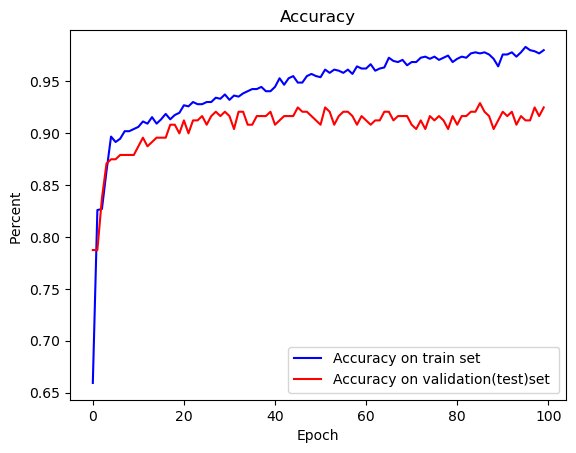

In [21]:
plt.plot( hist.history['accuracy'] , color = 'blue' )
plt.plot( hist.history['val_accuracy'] , color = 'red' )

# decrease in Accuracy on validation(test)set and increase in Accuracy on train set
# means overfitting after the turning point in epoch number (57)

plt.title('Accuracy')
plt.legend(('Accuracy on train set', 'Accuracy on validation(test)set '))
plt.ylabel('Percent ')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

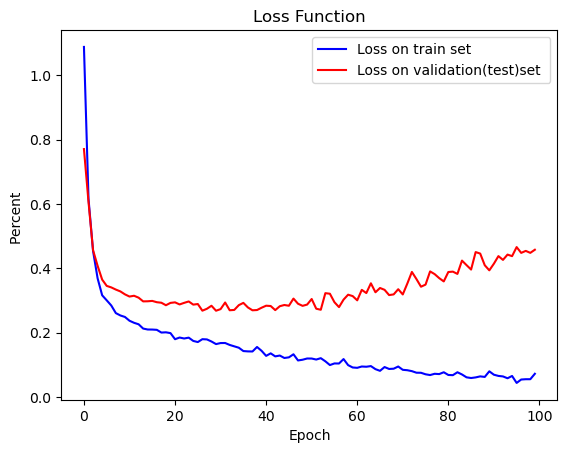

In [22]:
plt.plot( hist.history['loss'] , color = 'blue' )
plt.plot( hist.history['val_loss'] , color = 'red' )


# decrease in Loss on train set and increase in Loss on validation(test)set
# means overfitting after the turning point in epoch number (???)


plt.title('Loss Function')
plt.legend(('Loss on train set', 'Loss on validation(test)set '))
plt.ylabel('Percent ')
plt.xlabel('Epoch')

In [23]:
predictions = DNNmodel.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

8/8 [==============================] - 0s 1ms/step


In [24]:
print('\n y_test ')
print(y_test [0:240])

print('predicted class ')
print(predicted_classes [0:240])



 y_test 
[0 0 0 0 0 0 1 0 0 1 0 2 3 0 1 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 3 2 1 0 3 0 0 0 0 0 3 3 0 0 1 0 0 0 0
 0 0 2 0 0 0 0 0 2 1 0 0 0 0 0 3 0 2 0 0 3 3 0 0 1 0 0 0 0 0 0 0 0 0 2 3 0
 1 0 0 0 0 0 3 0 0 2 3 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 2 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3 3 3 0 0 0 0 0
 1 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0]
predicted class 
[0 0 0 0 0 0 1 0 0 3 0 2 3 0 1 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 3 3 1 0 0 0 0 0 0 0 3 3 0 0 2 0 0 0 0
 0 0 3 0 0 0 0 0 3 1 0 0 0 0 0 3 0 1 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0
 1 0 0 0 0 0 3 0 0 3 3 0 0 3 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 3 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 1 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 3 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 3 0 3 0 0 0 0 0
 1 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 

In [25]:
predictions

array([[9.99999940e-01, 2.83604784e-08, 1.37650308e-10, 1.92986543e-10],
       [9.99999940e-01, 2.26419021e-18, 6.31622231e-21, 7.36960896e-21],
       [9.99996126e-01, 3.56566829e-06, 6.83796912e-08, 1.13936643e-07],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 3.35526223e-36, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06059897e-01, 6.68955684e-01, 5.48742153e-03, 1.94970910e-02],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 2.06808627e-37],
       [9.99999940e-01, 1.24028251e-12, 2.21749454e-17, 2.51217664e-16],
       [7.90540278e-02, 9.70438197e-02, 9.65780579e-03, 8.14244330e-01],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90018298e-04, 1.96488691e-03, 9.52764213e-01, 4.50808369e-02],
       [2.37102769e-02, 1.68873696e-03, 7.88526959e-05, 9.74522173e-01],
       [9.99990046e-01, 9.78931439e-06, 1.76462329e

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       189
           1       0.78      0.58      0.67        12
           2       0.50      0.27      0.35        11
           3       0.71      0.89      0.79        28

    accuracy                           0.93       240
   macro avg       0.74      0.68      0.70       240
weighted avg       0.92      0.93      0.92       240



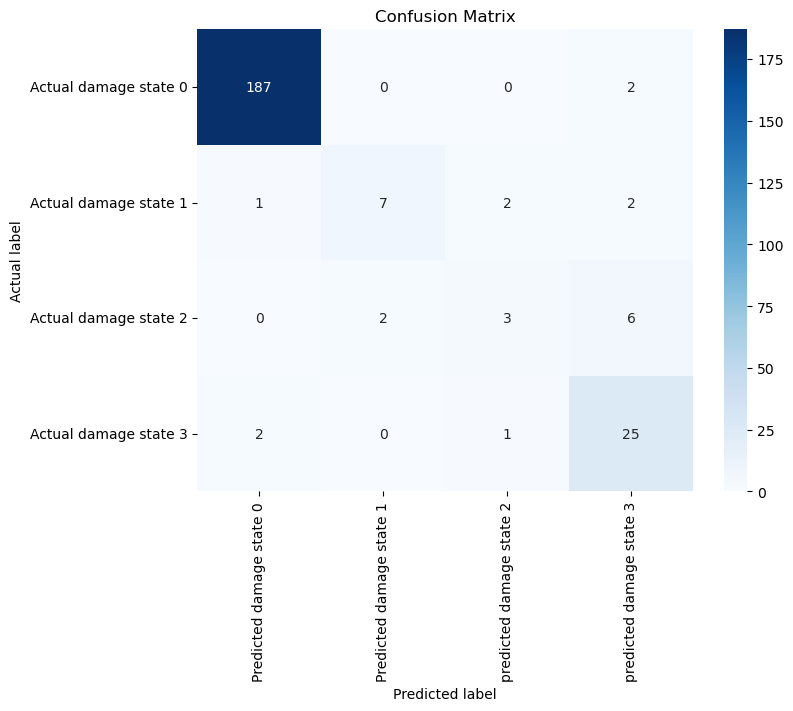

In [26]:
# confusion_matrix :

from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, predicted_classes))

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix,annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted damage state 0', 'Predicted damage state 1' , 'predicted damage state 2' , 'predicted damage state 3'], yticklabels=['Actual damage state 0', 'Actual damage state 1', 'Actual damage state 2' , 'Actual damage state 3'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes, labels=[0,1,2,3])

# Print the confusion matrix
print("Confusion Matrix:")
print(cnf_matrix)

Confusion Matrix:
[[187   0   0   2]
 [  1   7   2   2]
 [  0   2   3   6]
 [  2   0   1  25]]


In [28]:
print("Shape of y_test:", y_test.shape)
print("Shape of predicted_classes:", predicted_classes.shape)

Shape of y_test: (240,)
Shape of predicted_classes: (240,)


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)

Test set precision: 0.9202046783625731
Test set recall: 0.925
Test set F1 score: 0.9192132144561137


In [30]:
# jaccard_score : 

from sklearn.metrics import jaccard_score
print("jaccard_score : ")
jaccard_score(y_test, predicted_classes , average='weighted',pos_label=1)

jaccard_score : 


0.8785680020363409

## Train Set Accuracy

In [31]:
predictiontrain = DNNmodel.predict(X_train)
predictiontrainclasses = predictiontrain.argmax(axis=1)

30/30 [==============================] - 0s 1ms/step


In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true = y_train , y_pred = predictiontrainclasses)
acc_train

0.9895833333333334

# GUI

In [33]:
import sys
import numpy as np
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QPushButton, QVBoxLayout, QMessageBox


class PredictionApp(QWidget):
    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):
        self.setWindowTitle('ANN Prediction')

        layout = QVBoxLayout()

        self.input_labels = []
        self.input_fields = []

        # Feature names
        feature_names = [
            'faultindex', 'pgalong', 'pgatran', 'sat11', 'sat12', 'phi', 
            'scourdepthp1', 'scourdepthp2', 'scourdepthp3', 
            'numeliminatedspringsp1', 'numeliminatedspringsp2', 'numeliminatedspringsp3'
        ]

        # Create input fields
        for name in feature_names:
            label = QLabel(f'{name}:')
            self.input_labels.append(label)
            layout.addWidget(label)

            input_field = QLineEdit(self)
            self.input_fields.append(input_field)
            layout.addWidget(input_field)

        # Predict button
        self.predict_button = QPushButton('Predict', self)
        self.predict_button.clicked.connect(self.make_prediction)
        layout.addWidget(self.predict_button)

        # Result label
        self.result_label = QLabel('Prediction: N/A', self)
        layout.addWidget(self.result_label)

        self.setLayout(layout)

    def make_prediction(self):
        try:
            # Collect input data
            input_data = [float(field.text()) for field in self.input_fields]

            # Debug: Print input data
            print("Input Data:", input_data)

            # Convert input data to numpy array and reshape for the model
            input_array = np.array(input_data).reshape(1, -1)

            # Debug: Print input array
            print("Input Array:", input_array)

            # Make prediction using the model
            prediction = DNNmodel.predict(input_array)

            # Debug: Print raw model prediction
            print("Raw Model Prediction:", prediction)


            # Display the result
            self.result_label.setText(f'Prediction: Class {predicted_classes}')
        except Exception as e:
            QMessageBox.critical(self, 'Error', str(e))
            print("Error:", str(e))

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = PredictionApp()
    ex.show()
    sys.exit(app.exec_())


SystemExit: 0

C:\Users\arefj\anaconda3\envs\tensorflowenv\lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Sensitivity Analysis